In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '../')

import experiment
import pickle
from utils import *
from Architectures import *
import random, os
suppress_warnings()
EPOCHS = 256


def countp(model, params):
    tmp = model(**params)
    tmp.build(input_shape=(1,15,7))
    return tmp.count_params()


n_params = []

os.environ['PYTHONHASHSEED']=str(0)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])


filename = '../data/data100k_raw_combined_atlas_cut.pkl'
n_experiments = 8
SUFFIX = 'latent28'


#TESTING ######
# EPOCHS = 2
# filename = '../data/data50k_raw_combined_atlas_cut_small.pkl'
# n_experiments = 2
# SUFFIX = 'latent28'
###########

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.22/08


2022-07-12 18:01:09.781263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 18:01:09.781301: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import seaborn as sns
import os

#to get latex to work 
os.environ['PATH'] = "%s:/usr/local/cuda-11.2/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/anaconda/bin:/home/delon/texlive/bin/x86_64-linux:/home/delon/.local/bin:/home/delon/bin"%os.environ['PATH']


PIl64 = experiment.Experimenter(filename)
PIl64.fromSaved()

PI = experiment.Experimenter(filename)
PI.fromSaved(suffix=SUFFIX)

Initializing Experimenter
	Loading Data from ../data/data100k_raw_combined_atlas_cut.pkl
	Data Loaded
	Creating Splits
	Splits Created
Done initalizing
Loading Experimenter from Saved Experimenter at /data/delon/experimenter/data100k_raw_combined_atlas_cut
Experimenter Loaded
Getting split
Split Stored
Loading models
{'particlewise_128_4_64': 'models/data100k_raw_combined_atlas_cut_particlewise_128_4_64', 'nested_concat_70_4_64_3': 'models/data100k_raw_combined_atlas_cut_nested_concat_70_4_64_3', 'nested_concat_general_68_3_64_3': 'models/data100k_raw_combined_atlas_cut_nested_concat_general_68_3_64_3', 'tripletwise_5_(64, 128, 256, 128, 64)_64': 'models/data100k_raw_combined_atlas_cut_tripletwise_5_(64, 128, 256, 128, 64)_64', 'pairwise_5_(64, 128, 256, 128, 64)_64': 'models/data100k_raw_combined_atlas_cut_pairwise_5_(64, 128, 256, 128, 64)_64', 'pairwise_nl_5_(64, 128, 256, 128, 64)_32_64': 'models/data100k_raw_combined_atlas_cut_pairwise_nl_5_(64, 128, 256, 128, 64)_32_64', 'pairwis

2022-07-12 18:01:42.632710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-12 18:01:42.632768: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 18:01:42.632819: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (top1.hep.utexas.edu): /proc/driver/nvidia/version does not exist
2022-07-12 18:01:42.633361: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
latent64 = PIl64.models['%s_%s'%('pairwise', PIl64.get_tail_string(model_params_dict['pairwise']))]
latent2 = PI.models['latent_two_5_(64, 128, 256, 128, 2)_64']
latent8 = PI.models['latent_eight_5_(64, 128, 256, 128, 8)_64']

In [5]:
PI.get_ROC('latent_two', model_params_dict['latent_two'])

getting ROC for latent_two
currently on latent_two_5_(64, 128, 256, 128, 2)_64


(array([0.        , 0.        , 0.        , ..., 0.97726361, 0.97733048,
        1.        ]),
 array([0.00000000e+00, 3.32314236e-05, 4.95148212e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99984789e+00, 9.99847889e-01, 9.98715162e-01, ...,
        2.19616995e-05, 2.18937785e-05, 1.10760304e-10], dtype=float32),
 0.9602683074566158)

2022-07-12 18:02:28.936670: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-12 18:02:28.937705: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2397305000 Hz


In [6]:
X_test_latent, y_test_latent = PI.get_test_dataset('latent_two')
X_test, y_test = PIl64.get_test_dataset('pairwise')
X_test_ATLAS, y_test_ATLAS = gen_dataset_high_level(PIl64.events_test, PIl64.events_oup_test, PIl64.events_tag_test)

In [7]:
n_cut = int(len(X_test)*0.1)
assert(len(X_test) == len(X_test_latent))

indices = np.random.permutation(len(X_test))
cut = np.s_[indices[:n_cut]]

latent_label = y_test.numpy()[cut]
latent_label_28 = y_test_latent.numpy()[cut]

In [8]:
latent64_embedded = compute_tsne(latent64, X_test=X_test, cut=cut)
ATLAS_embedded = compute_tsne_embedded(np.array(X_test_ATLAS)[cut])
latent8_embedded = compute_tsne(latent8, cut=cut, X_test=X_test_latent)

computing tsne
--------------------------------------------------------------------------------
TSNE(n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=500.00 for 250 iterations...
Iteration   50, KL divergence 2.2271, 50 iterations in 2.4540 sec
Iteration  100, KL divergence 2.2299, 50 iterations in 2.1015 sec
Iteration  150, KL divergence 2.2302, 50 iterations in 2.0918 sec
Iteration  200, KL divergence 2.2298, 50 iterations in 2.0572 sec
Iteration  250, KL divergence 2.2296, 50 iterations in 1.9699 sec
   --> Time elapsed: 10.68 seconds
===> Running optimization with exaggeration=1.00, lr=500.00 for 500 iterations...
Iteration   50, KL divergence 1.3360, 50 iterations in 2.1843 sec
Iteration  100, KL divergence 1.2402, 50 iterations in 2.1730 sec
Iteration  150, KL divergence 1.2080, 50 iterations in 2.2257 sec
Iteration  200, KL divergence 1.1928, 50 iterations in 2.1811 sec

In [9]:
latent2_embedded = compute_tsne(latent2, cut=cut, X_test=X_test_latent)

computing tsne
--------------------------------------------------------------------------------
TSNE(n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=500.00 for 250 iterations...
Iteration   50, KL divergence 2.0545, 50 iterations in 2.3436 sec
Iteration  100, KL divergence 2.0028, 50 iterations in 2.3533 sec
Iteration  150, KL divergence 2.0028, 50 iterations in 2.3878 sec
Iteration  200, KL divergence 2.0028, 50 iterations in 2.4259 sec
Iteration  250, KL divergence 2.0028, 50 iterations in 2.4992 sec
   --> Time elapsed: 12.01 seconds
===> Running optimization with exaggeration=1.00, lr=500.00 for 500 iterations...
Iteration   50, KL divergence 0.6195, 50 iterations in 2.3410 sec
Iteration  100, KL divergence 0.3612, 50 iterations in 2.4629 sec
Iteration  150, KL divergence 0.2621, 50 iterations in 2.4066 sec
Iteration  200, KL divergence 0.2212, 50 iterations in 2.3758 sec

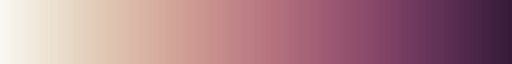

In [10]:
sns.cubehelix_palette(start=2/10, light=.97, as_cmap=True)

In [ ]:
axATLAS = gen_tsne(ATLAS_embedded, latent_label, text=r'\textbf{ATLAS Features}',
                   cmap = sns.cubehelix_palette(start=2/10, light=.97, as_cmap=True), col_aux='#f49595')
axATLAS.savefig('figures/ATLAS_tsne.pdf')

[2.27373675e-16 5.63697237e-16] [16.50196956 11.96955512]
0.9897723523589574
earth_movers_distance 1.2621150339177813


In [ ]:
ax = gen_tsne(latent2_embedded, latent_label_28, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^1}$',
             cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True), col_aux='#95f4b7')
ax.savefig('figures/l2_tsne.pdf')

In [ ]:
ax = gen_tsne(latent8_embedded, latent_label_28, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^3}$',
              cmap=sns.cubehelix_palette(start=20/10, light=.97, as_cmap=True), col_aux='#95b3f4')
ax.savefig('figures/l8_tsne.pdf')

In [ ]:
axl64 = gen_tsne(latent64_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',
                )
axl64.savefig('figures/l64_tsne.pdf')

In [ ]:
l2_yhat = LatentGetter(latent2.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
no_tsne= gen_tsne(l2_yhat, y_test_latent.numpy()[cut], text=r'Latent Represetations',
                  cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True, hue=0), col_aux='#737373',
                  EMD=False,
         rotated=True, log=False, bnds=True, standardized=False)
no_tsne.savefig('figures/l2_notsne.pdf')

In [ ]:
ax = gen_tsne(latent2_embedded, latent_label_28, text=r'\textbf{t-SNE Embedding} of Latent Represetations',
             cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True), col_aux='#95f4b7',
              EMD=False)
ax.savefig('figures/l2_tsne_waxis.pdf')

In [ ]:
l64_yhat = LatentGetter(latent64.layers[0:3], condensed=True).predict(X_test.numpy()[cut])
print(emd(l64_yhat, y_test.numpy()[cut]))

In [ ]:
l8_yhat = LatentGetter(latent8.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
print(emd(l8_yhat, y_test_latent.numpy()[cut]))

In [ ]:
l2_yhat = LatentGetter(latent2.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
print(emd(l2_yhat, y_test_latent.numpy()[cut]))

In [ ]:
print(emd(np.array(X_test_ATLAS), y_test_ATLAS))

In [ ]:
TEMP_gen_tsne(latent64_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',)

In [ ]:
TEMP_gen_tsne(latent8_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',)

In [ ]:
TEMP_gen_tsne(latent2_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',)

In [ ]:
TEMP_gen_tsne(ATLAS_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',)